# Popular Data Science Questions

Here is a link to the Dataquest __[key](https://github.com/dataquestio/solutions/blob/master/Mission469Solutions.ipynb)__.

### Introduction

In this scenario, suppose one is working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

One is tasked with figuring out what is the best content to write about. Note there is some leeway in what "best" means in this context.

Suppose the employee is passionate about helping people learn and decides to scower the internet in search for the answer to the question, "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

If one wants to figure out what programming content to write, one could consult __[Stack Overflow](https://stackoverflow.com/)__ (a question and answer website about programming), which is a part of a question and answer website called __[Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange)__, to see what kind of content is more popular.

### Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and __[data science](https://datascience.stackexchange.com/)__.

Stack Exchange employs a reputation award system for its questions and answers. Each post - each question/answer - is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If one is not familiar with Stack Overflow or any other Stack Exchange site, one can review __[this](https://stackexchange.com/tour)__ tour.

Being a multidiciplanary field, there are a few Stack Exchange websites that are relevant to the goal here:

* __[Data Science](https://datascience.stackexchange.com/)__
* __[Cross Validated](https://stats.stackexchange.com/)__ - a statistics site
* __[Artificial Intelligence](https://ai.stackexchange.com/)__
* __[Mathematics](https://math.stackexchange.com/)__
* __[Stack Overflow](https://stackoverflow.com/)__

And if one wants to include Data Engineering, one can also consider:

* __[Database Administrators](https://dba.stackexchange.com/)__
* __[Unix & Linux](https://unix.stackexchange.com/)__
* __[Sofware Engineering](https://softwareengineering.stackexchange.com/)__

Data Science Stack Exchange (DSSE) is a data science dedicated site that has a lot of unanswered questions, making it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

**The goal of this analysis is to use __[Data Science Stack Exchange](https://datascience.stackexchange.com/)__ to determine what content should a data science company create, based on interest in subject.**

**What kind of questions are welcome on the site?**

On DSSE's help center's __[section on question](https://datascience.stackexchange.com/help/asking)__, one can read that one should:

* Avoid subjective questions.
* Ask practical questions about Data Science - there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to the goal.

The help center also suggests that in addition to the sites mentioned in the *Learn* section, there are another two sites that are relevant:

* __[Open Data](https://opendata.stackexchange.com/help/on-topic)__ (Data requests)
* __[Computational Science](https://scicomp.stackexchange.com/help/on-topic)__ (Software packages and algoriths in applied mathematics)

**What, other than questions, does DSSE's __[home](https://datascience.stackexchange.com/)__ subdivide into?**

On the __[home page](https://datascience.stackexchange.com/)__ one can see taht there are four sections:

* __[Questions](https://datascience.stackexchange.com/questions)__ - a list of all questions asked;
* __[Tags](https://datascience.stackexchange.com/tags)__ - a list of tags (keywords or labels that categorize questions);
* __[Users](https://datascience.stackexchange.com/users)__ - a list of users;
* __[Unanswered](https://datascience.stackexchange.com/unanswered)__ - a list of unanswered questions;

The tagging system used by Stack Exchange will be very useful and allow one to quantify how many questions are asked about each subject.

Something elese one can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives one some confidence in using the tagging system to derive conclusions

**What information is available in each post?**

Looking, just as an example, at __[this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1)__ question, some of the information available is:

* For both questions and answers:
    * The posts's score;
    * The posts's title;
    * The posts's author;
    * The posts's body;
* For questions only:
    * How many users have it on their "
    * The last time the question was active;
    * How many times the question was viewed;
    * Related questions;
    * The question's tags;

### Stack Exchange Data Explorer

After identifying that tags will be useful in categorizing content, now comes the challenge of accessing the data *en masse*. One solution is to scrape the site. However, an easier alternative is to use Stack Exchange's public data base for each of its websites. __[Here's](https://data.stackexchange.com/datascience/query/new)__ a link to query and explore Data Science Stack Exchange's database.

Note that SEDE uses Transact-SQL i.e. Microsoft's SQL. Most things are the same as SQLite, but some a different. For instance, one would use `TOP 10` in the `SELECT` statement to select the top 10 results from a query.

```
SELECT TOP 10 *
  FROM Tags
```

Perusing the table names, a few stand out as relevant for the goal:

* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploritory queries, leads one to focus efforts on Posts table. Tags is also a promising table because it tells explicitly how many times each tag was used, but there is not way to tell just from this if the interest in these tags is recent.

### Getting the Data

The Posts table has a lot of columns. However, one should only query those that seem relevant towards one's goal:

* `Id`: An identification number for the post.
* `PostTypeId`: An identification number for the type of post.
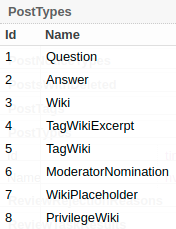
* `CreationDate`: The date and time of creation of the post.
* `Score`: The post's score.
* `ViewCount`: How many times the post was viewed.
* `Tags`: What tags were used.
* `AnswerCount`: How many answers the question got (only applicable to question posts).
* `FavoriteCount`: How many times the question was favored (only applicable to question posts).

There are eight different types of post. Before one tries to figure out which of them are relevant, check how many of each of them there  are:

```
SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM Posts
 GROUP BY PostTypeId;
```

|PostTypeId|NrOfPosts|
|----------|---------|
|1|21446|
|2|23673|
|4|236|
|5|236|
|6|11|
|7|1|

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant. This analysis focuses on the questions.

Since only recent posts are of interest, limit the analysis to the posts of 2019.

To get the relevant data run the following query.

```
SELECT Id, PostTypeId, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```

Download the results as `dsse_questions_2019.csv`.

### Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('dsse_questions_2019.csv', parse_dates=['CreationDate'])
print(questions.info())
questions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 8 columns):
Id               7410 non-null int64
PostTypeId       7410 non-null int64
CreationDate     7410 non-null datetime64[ns]
Score            7410 non-null int64
ViewCount        7410 non-null int64
Tags             7410 non-null object
AnswerCount      7410 non-null int64
FavoriteCount    1534 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 463.2+ KB
None


,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,62095,1,2019-10-22 18:50:20,0,20,<r><regression>,0,NaN
1,62096,1,2019-10-22 19:01:03,1,62,<tensorflow><nlp><word-embeddings>,1,NaN
2,62101,1,2019-10-22 20:36:42,4,160,<xgboost>,2,NaN
3,62103,1,2019-10-22 23:52:38,5,119,<pca>,1,1.0
4,62104,1,2019-10-23 00:11:37,0,1767,<python>,1,NaN


As one can see, the `FavoriteCount` column has missing values. A missing value in this column probably means the question has not been favorited, so the missing value can be filled with a `0`.

The types seem adequate for every column, however, after filling the missing values in `FavoriteCount`, there is no reason why this column should not be an integer.

Since the object dtype is a catch-all type, one should look more closely at the object types in `questions['Tags']`.

In [3]:
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

### Cleaning the Data

The values in the `Tags` column are strings that look like this:

```
"<machine-learning><regression><linear-regression><regularization>"
```

One should transform this string into something more suitable to use typical string methods. The goal is to transform strings like the one above into something like:

```
"machine-learning,regression,linear-regression,regularization"
```

In [4]:
questions.fillna(value={'FavoriteCount':0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 8 columns):
Id               7410 non-null int64
PostTypeId       7410 non-null int64
CreationDate     7410 non-null datetime64[ns]
Score            7410 non-null int64
ViewCount        7410 non-null int64
Tags             7410 non-null object
AnswerCount      7410 non-null int64
FavoriteCount    7410 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 463.2+ KB


In [5]:
# Clean Tags column
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")
questions.sample(4)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6620,52318,1,2019-05-21 11:24:52,2,208,"[deep-learning, classification, dataset, compu...",2,1
3892,57863,1,2019-08-20 10:44:09,0,1466,"[scikit-learn, svm]",1,1
3337,46897,1,2019-03-08 01:12:44,0,79,"[machine-learning, deep-learning, convnet, rei...",1,0
3662,65021,1,2019-12-17 17:30:31,2,102,"[time-series, lstm, data-cleaning]",2,0


### Most Used and Most Viewed

Now focus on determining the most popular tags by considering two different proxies for popularity. For each tag, count how many times the tag was used, and how many times a question with that tag was viewed.

It is also reasonable to take into account the score, or whether or not a question is part of someone's favorite questions.

In [6]:
# Count how many times each tag was used
tag_count = dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_used

,Count
machine-learning,2295
python,1563
deep-learning,984
neural-network,901
keras,785
classification,605
scikit-learn,472
tensorflow,470
nlp,429
cnn,407


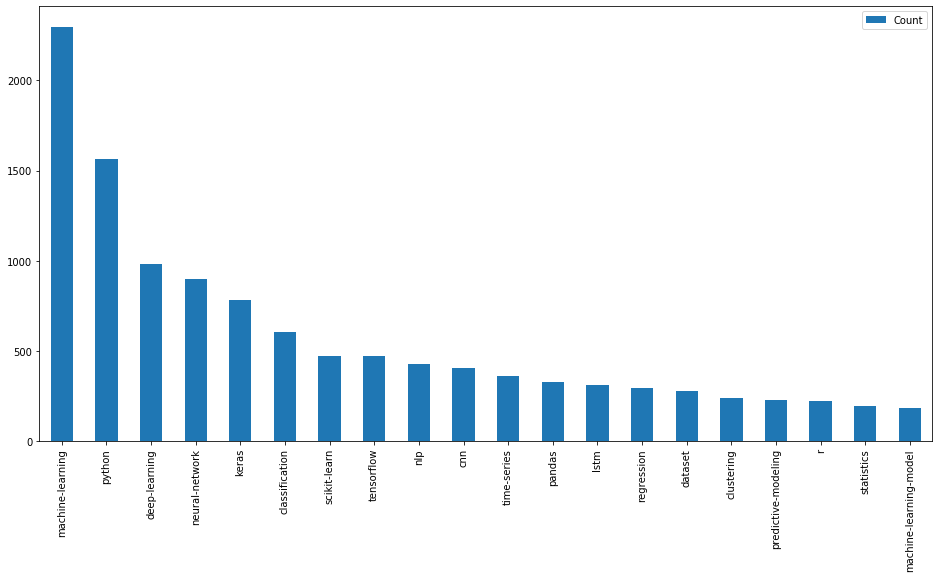

In [7]:
# Visualize results for top tags by 'Count'
most_used.plot(kind='bar', figsize=(16,8))

Some tags are very broad and are unlikely to be useful; e.g.: python, dataset, r.

In [8]:
# Count how many times each tag was viewed
tag_views = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_views:
            tag_views[tag] += row['ViewCount']
        else:
            tag_views[tag] = row['ViewCount']
            
tag_views = pd.DataFrame.from_dict(tag_views, orient='index')
tag_views.rename(columns={0: 'Views'}, inplace=True)
most_viewed = tag_views.sort_values(by="Views", ascending=False).head(20)
most_viewed

,Views
python,1431221
machine-learning,921790
pandas,647670
keras,636921
deep-learning,533758
neural-network,450010
scikit-learn,335158
tensorflow,308484
classification,252877
dataframe,249305


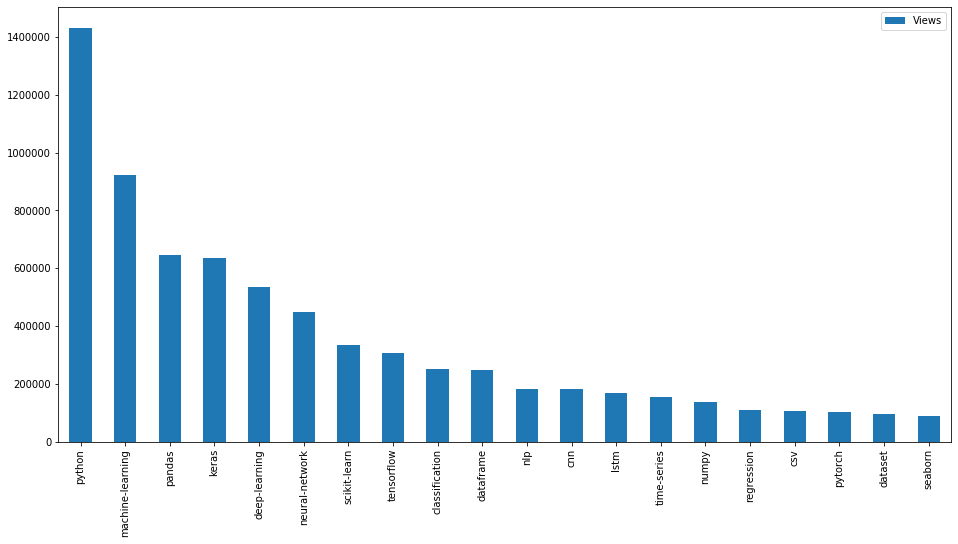

In [9]:
most_viewed.plot(kind='bar', figsize=(16,8))

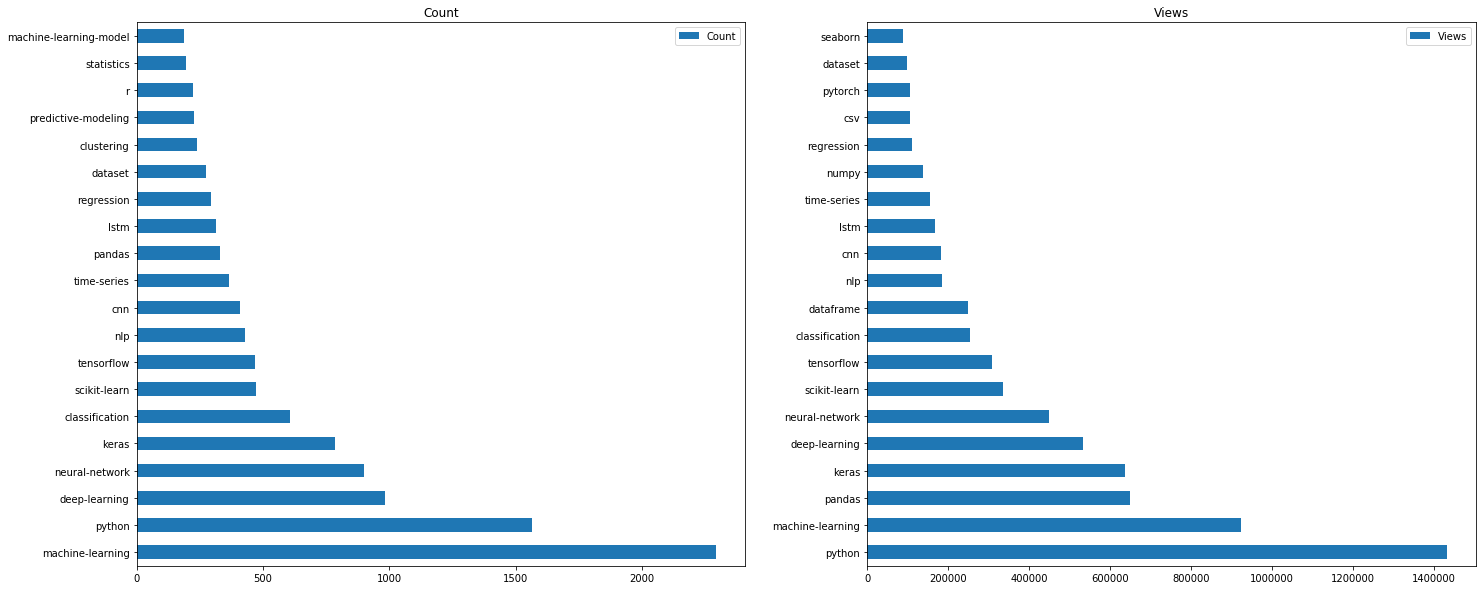

In [10]:
# Look at the plots side by side
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
most_used.plot(kind='barh', ax=axes[0], subplots=True)
most_viewed.plot(kind='barh', ax=axes[1], subplots=True)
plt.show()

### Relations Between Tags

In [11]:
in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)
in_used

,Count,Views
machine-learning,2295,921790.0
python,1563,1431221.0
deep-learning,984,533758.0
neural-network,901,450010.0
keras,785,636921.0
classification,605,252877.0
scikit-learn,472,335158.0
tensorflow,470,308484.0
nlp,429,184177.0
cnn,407,181607.0


In [12]:
in_viewed

,Count,Views
python,1563.0,1431221
machine-learning,2295.0,921790
pandas,330.0,647670
keras,785.0,636921
deep-learning,984.0,533758
neural-network,901.0,450010
scikit-learn,472.0,335158
tensorflow,470.0,308484
classification,605.0,252877
dataframe,NaN,249305


The tags in `most_used` and not present in `most_viewed` are:
* `clustering`
* `predictive-modeling`
* `r`
* `statistics`
* `machine-learning-model`

The tags in `most_viewed` but not in `most_used` are:
* `dataframe`
* `numpy`
* `csv`
* `pytorch`
* `seaborn`

Some tags also stand out as being related. For example, `python` is related to `pandas`, since pandas is a Python library. By writting about pandas, one can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like `pandas` and `r`:

In [13]:
questions[questions['Tags'].apply(
    lambda tags: True if 'r' in tags and 'pandas' in tags else False)
         ]

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5307,49148,1,2019-04-11 19:41:39,1,146,"[r, data-mining, pandas, matlab, databases]",3,0


One can look at these questions by replacing `ID` in `https://datascience.stackexchange.com/questions/ID` with the question's `Id` value to see what it is about.

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

Begin by creating a list of all tags:

In [14]:
all_tags = list(tag_count.index)

Create a dataframe where each row and each column represents a tag:

|    |tag1|tag2|tag3|
|----|----|----|----|
|tag1|    |    |    |
|tag2|    |    |    |
|tag3|    |    |    |

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,r,regression,tensorflow,nlp
r,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN
nlp,NaN,NaN,NaN,NaN


Now fill this dataframe with zeros and then, for each list of tags in `question['Tags']`, increment the intervening tags by 1.

In [16]:
associations.fillna(0, inplace=True)

for tags in questions['Tags']:
    associations.loc[tags, tags] += 1
    associations.iloc[0:4,0:4]

The dataframe is quite large, so one should focus attention on the most used tags format the dataframe so it is easier to talk about.

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc['time-series', 'r'] = 'background-color: yellow'
    helper_df.loc['r', 'time-series'] = 'background-color: yellow'
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = 'color: blue'
        
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

The cells highlighted in yellow tell one that time-series was used together with r 18 times. The values in blue tell one how many times each of the tags was used.

One should create a heatmap after removing the vlaues in blue, otherwise the colors will be too skewed.

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap='Greens', annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the top left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having a strong relation between them.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that wnen used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how does one attack both these problems? There is a powerful data mining technique that allows one to handle this: __[association rules](https://en.wikipedia.org/wiki/Association_rule_learning)__. Association rules allows one to analytically spot relations. Moreover, one can also measure how strong these relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (__[statistical independence](https://en.wikipedia.org/wiki/Independence_(probability_theory)__).

### Enter Domain Knowledge

__[Keras](https://keras.io/)__, __[scikit-learn](https://scikit-learn.org/stable/)__, and __[TensorFlow](https://www.tensorflow.org/)__ are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If one wants to be very specific, one can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At a glance, someone with sufficient domain knowledge can tell that the most popular topic in 2019 as shown by the analysis, is deep learning.

### Just a Fad?

To determine if interest in deep learning is slowing down, one can return to SEDE and save a file containing the results of the query below, which fetches all the questions ever asked on DSSE, their dates and tags.

```
SELECT Id, CreationDate, Tags
  FROM Posts
 WHERE PostTypeId=1;
```

One should use this data to track the interest in deep learning across time by:

* Counting how many deep learning questions are asked every 3 months.
* The total amount of questions per time period
* How many deep learning questions there are relative to the total amount of questions per time period.

First read the file into a dataframe and parse the dates:

```
all_q = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
```

Clean the tags column:

```
all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split("><")
```

Before deciding which questions shuld be classified as being deep learning questions, one should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag will be: a tag that belongs to the list `['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']`.

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

Now, create a function that assigns `1` to deep learning questions and `0` otherwise:

```
def class_deep_learning(tags):
    for tag in tags:
        if tag in ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']:
            return 1
    return 0
```

```
all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)
```

The data-science-technology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Track it quarterly.

Since one doesn't have all the data for 2020, remove those dates:

```
all_q = all_q[all_q['CreationDate'].dt.year < 2020]
```

Create a column that identifies in which a question was asked.

```
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)
    
all_q['Quarter'] = all_q['CreationDate'].apply(fetch_quarter)
```

Finally, group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers.

```
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

# The following is done to help with visualizations later
quarterly.reset_index(inplace=True)
```

```

ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)
```

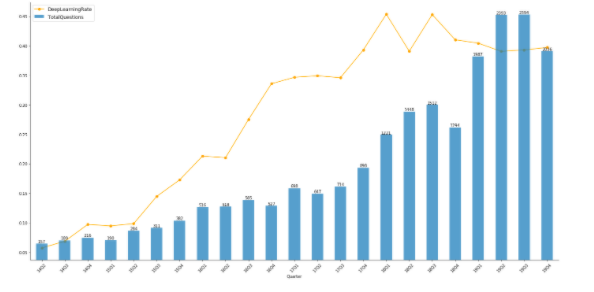

### Conclusion

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing, and so one can maintain the preious idea of proposing that the company should create deep learning content.